# Support vector regression (SVR)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.svm import SVR

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

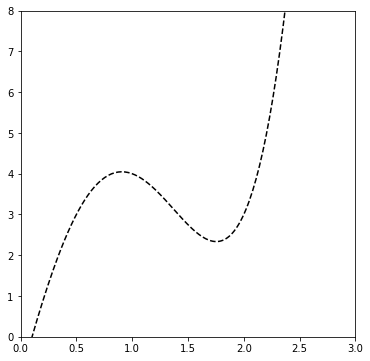

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

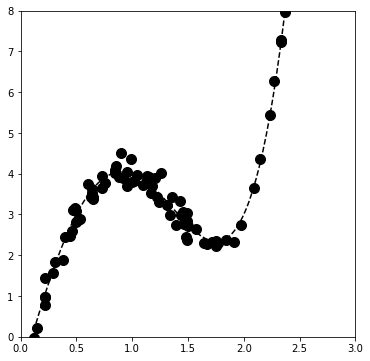

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# kernel='linear'

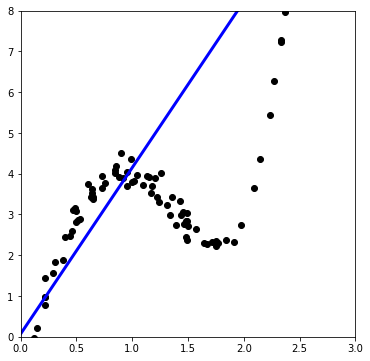

In [34]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))
svr_lin_1 = SVR(kernel='linear', C=1e3)
y_rbf = svr_lin_1.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_lin_1.predict(x_plot), color='blue',linewidth=3)
plt.show()

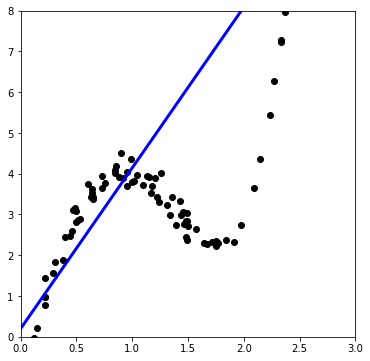

In [35]:
svr_lin_2 = SVR(kernel='linear', C=10)
y_rbf = svr_lin_2.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_lin_2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# kernel='poly'

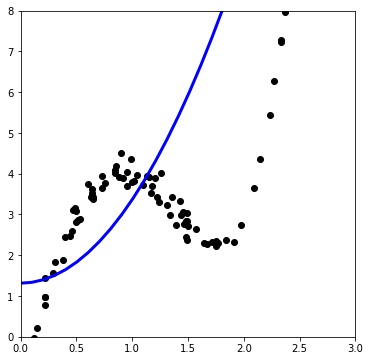

In [39]:
svr_poly_1 = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_poly_1.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_poly_1.predict(x_plot), color='b', linewidth=3)
plt.show()

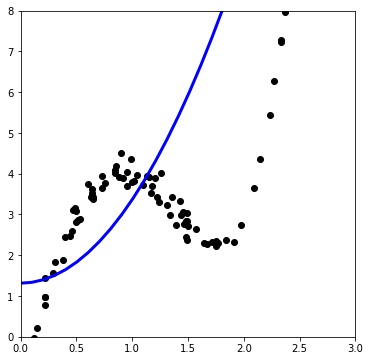

In [46]:
svr_poly_2 = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_poly_2.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_poly_2.predict(x_plot), color='b', linewidth=3)
plt.show()

# kernel='rbf'

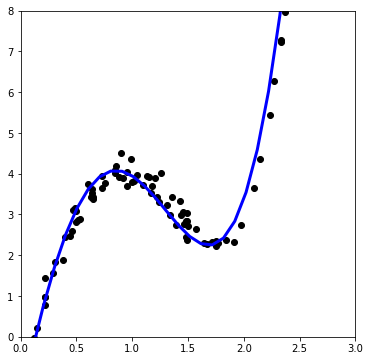

In [47]:
svr_rbf_1 = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf_1.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_rbf_1.predict(x_plot), color='b',linewidth=3)
plt.show()

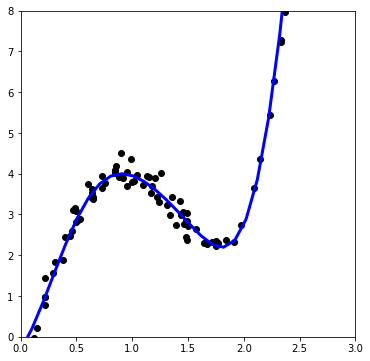

In [48]:
svr_rbf_2 = SVR(kernel='rbf', C=10, gamma=1.1)
y_rbf = svr_rbf_2.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr_rbf_2.predict(x_plot), color='b',linewidth=3)
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

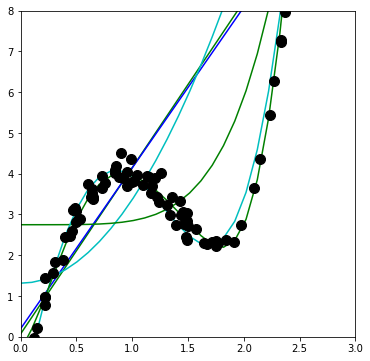

In [32]:

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, svr_lin_1.predict(x_plot), 'g');
plt.plot(x_plot, svr_lin_2.predict(x_plot), 'b');
plt.plot(x_plot, svr_poly_1.predict(x_plot), 'c');
plt.plot(x_plot, svr_poly_2.predict(x_plot), 'g');
plt.plot(x_plot, svr_rbf_1.predict(x_plot), 'c');
plt.plot(x_plot, svr_rbf_2.predict(x_plot), 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Musimy mieć jakąś miarę oceny.

In [50]:
from sklearn import  metrics
regressors = {}
regressors['svr_lin_1'] = svr_lin_1
regressors['svr_lin_1'] = svr_lin_2
regressors['svr_poly_1'] = svr_poly_1
regressors['svr_poly_2'] = svr_poly_2
regressors['svr_rbf_1'] = svr_rbf_1
regressors['svr_rbf_2'] = svr_rbf_2

for key in regressors:
    print(key)
    regr = regressors[key]
    print("Explained variance score: {}".format( metrics.explained_variance_score(y, regr.predict(x_plot)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y, regr.predict(x_plot)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y, regr.predict(x_plot)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, regr.predict(x_plot))))

svr_lin_1
Explained variance score: -3.17345302240561
Median absolute error: 15.686491527071261
Mean squared error: 374.30845034103135
Mean absolute errors: 16.096436571759376
svr_poly_1
Explained variance score: -85.9046209974951
Median absolute error: 45.605742360639994
Mean squared error: 7978.322188027705
Mean absolute errors: 65.63035672167432
svr_poly_2
Explained variance score: -85.9046209974951
Median absolute error: 45.605742360639994
Mean squared error: 7978.322188027705
Mean absolute errors: 65.63035672167432
svr_rbf_1
Explained variance score: -113.66140848391719
Median absolute error: 89.56544969864851
Mean squared error: 13283.869009156993
Mean absolute errors: 92.31643299684248
svr_rbf_2
Explained variance score: -1.2649294156710091
Median absolute error: 6.710901191927537
Mean squared error: 121.53511746326939
Mean absolute errors: 8.543597912986455
